In [ ]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import random
import math
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Задание 6

Иван решил проехать из города А в город Б по дороге длиной 800 км на
необычном транспортном средстве (далее ТС), движение которого зависит от результатов
бросков игральной кости. Условия одного шага передвижения следующие:
- если при броске кости выпадает 1 и 2, то ТС везет Ивана на 5 км вперед;
- если выпадает 3 или 4, то ТС возвращает Ивана на 5 км назад, но не дальше города
А;
- если выпадает 5 или 6, то Иван бросает кость повторно и ТС провозит Ивана вперед
на расстояние (в км), равное произведению выпавшего числа очков на пять.
При достижении города Б ТС Ивана останавливается.

1) Путем компьютерного моделирования получите историю передвижения Ивана за
140 шагов и визуализируйте ее (постройте график зависимости удаленности Ивана от
города А от номера шага). Повторите моделирование многократно, используя для
визуализации одну систему координат.
2) Рассмотрите случайную величину X – расстояние, на которое Иван удалился от
города за 80 шагов. Основываясь на результатах компьютерного моделирования,
сформулируйте гипотезы о законе ее распределения и проверьте их. Оцените вероятность,
что за 110 шагов Иван доберется до города Б.
3) Постройте доверительные интервалы для математического ожидания и дисперсии
случайной величины X.

### ***Пункт 1***

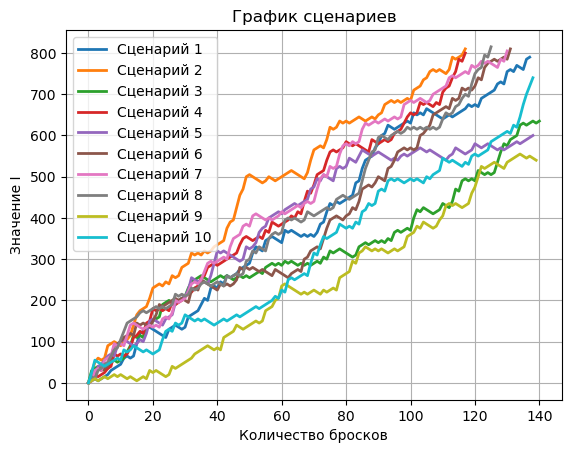

In [98]:
def Ivan(N):
    I = [0]
    a = [1, 2, 3, 4, 5, 6]  # 1 - позитивный сценарий, 0 - негативный сценарий
    x = 1
    p = [1/6] * 6  # Вероятности для каждого сценария

    for i in range(N):
        x_n = np.random.choice(a, x, True, p)

        # Проверяем, что длина списка больше 1 перед доступом к I[-1]
        if I[-1] >= 800:
            break

        match x_n[0]:  # Используем x_n[0] для получения значения
            case 1 | 2:
                I.append(I[-1] + 5)
            case 3 | 4:
                if I[-1] > 5:
                    I.append(I[-1] - 5)
            case 5 | 6:
                I.append(I[-1] + np.random.choice(a, x, True, p)[0] * 5)

    return I  # Возвращаем список I

# Список для хранения всех кривых
all_curves = []

# Вызов функции несколько раз и сохранение результатов
for _ in range(10):
    curve = Ivan(140)
    all_curves.append(curve)

# Построение графика
plt.figure()
for curve in all_curves:
    plt.plot(range(len(curve)), curve, lw=2)  # Отображаем каждую кривую

plt.title("График сценариев")
plt.grid(True)
plt.xlabel("Количество бросков")
plt.ylabel("Значение I")
plt.legend([f'Сценарий {i+1}' for i in range(len(all_curves))])  # Легенда для каждого сценария
plt.show()  # Отображение графика

### ***Пункт 2***

79.081


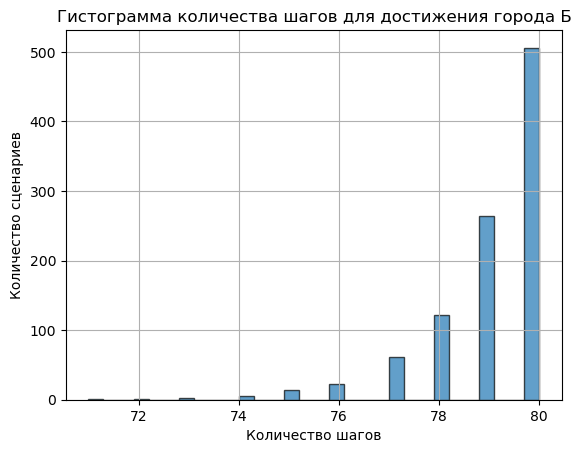

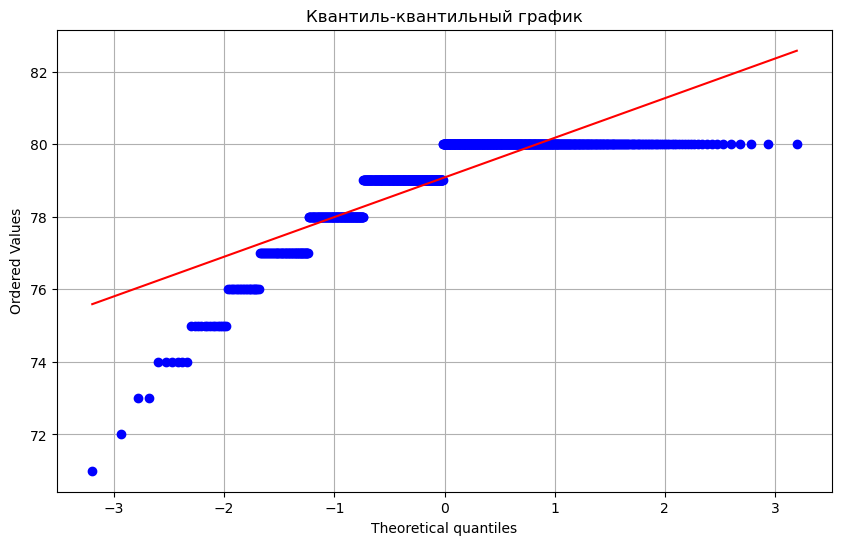

Статистика теста Шапиро-Уилка: 0.7297438383102417, p-значение: 2.1501707486958513e-37
Вероятность достижения города Б за 110 шагов: 0.0820
[80, 80, 80, 80, 80, 80, 79, 79, 80, 80, 78, 80, 80, 78, 78, 79, 80, 78, 80, 77, 79, 79, 77, 79, 80, 80, 79, 79, 79, 80, 80, 80, 80, 80, 79, 80, 74, 78, 80, 79, 80, 80, 79, 80, 80, 80, 79, 80, 80, 80, 80, 77, 79, 80, 80, 75, 79, 80, 79, 78, 73, 79, 80, 78, 77, 80, 80, 75, 75, 80, 80, 80, 80, 79, 77, 78, 79, 80, 80, 79, 78, 78, 80, 80, 80, 79, 76, 76, 80, 78, 80, 79, 80, 80, 80, 79, 78, 80, 80, 80, 79, 80, 77, 80, 79, 80, 80, 79, 78, 80, 80, 78, 77, 80, 79, 80, 78, 76, 79, 78, 79, 80, 80, 78, 80, 80, 79, 80, 80, 80, 80, 80, 77, 80, 79, 80, 80, 79, 80, 80, 78, 80, 77, 79, 80, 80, 79, 79, 79, 79, 80, 79, 78, 78, 80, 79, 80, 80, 80, 80, 79, 80, 80, 78, 80, 79, 77, 79, 80, 79, 80, 80, 77, 80, 80, 80, 80, 79, 80, 79, 79, 78, 78, 78, 79, 77, 79, 79, 80, 79, 79, 80, 80, 78, 80, 78, 80, 80, 80, 80, 80, 80, 80, 78, 80, 80, 80, 79, 80, 80, 78, 80, 79, 78, 80, 

In [ ]:
# Список для хранения количества шагов
steps_to_reach_B = []

# Моделирование многократных сценариев
num_simulations = 1000
for _ in range(num_simulations):
    a = Ivan(80)
    steps = len(a) -1  # Получаем количество шагов для достижения города Б
    steps_to_reach_B.append(steps)

print(np.mean(steps_to_reach_B))

# Построение гистограммы
plt.hist(steps_to_reach_B, bins=30, edgecolor='black', alpha=0.7)
plt.title('Гистограмма количества шагов для достижения города Б')
plt.xlabel('Количество шагов')
plt.ylabel('Количество сценариев')
plt.grid(True)
plt.show()

# Квантиль-квантильный график
plt.figure(figsize=(10, 6))
sts.probplot(steps_to_reach_B, dist="norm", plot=plt)
plt.title('Квантиль-квантильный график')
plt.grid(True)
plt.show()

# Тест Шапиро-Уилка на нормальность
shapiro_test = sts.shapiro(steps_to_reach_B)
print(f'Статистика теста Шапиро-Уилка: {shapiro_test.statistic}, p-значение: {shapiro_test.pvalue}')

# Оценка вероятности достижения города Б за 110 шагов
Steps = []

num_simulations = 1000
for _ in range(num_simulations):
    a = Ivan(300)# Видно, что мы упираемся в значение 80 и нужно взять больше шагов
                 # это позволит нам более точно определить искомую вероятность
    steps = len(a)  # Получаем количество шагов для достижения города Б
    Steps.append(steps)

successful_arrivals = sum(1 for steps in Steps if steps <= 110)
probability_of_arrival = successful_arrivals / num_simulations
print(f'Вероятность достижения города Б за 110 шагов: {probability_of_arrival:.4f}')

print(steps_to_reach_B)


### ***По тесту Шапиро-Уилка и графику q-q видно, что это точно не нормальное распределение, а гистограмма очень похожа на обратное эксподенциальное***

### ***Пункт 3***

In [110]:
random = np.random.default_rng()

# Создаем доверительные интервалы для дисперсии и математического ожидания с помощью бутстрепа
disp = sts.bootstrap((steps_to_reach_B,), np.std, axis=-1, confidence_level=0.95, random_state=random) # Для дисперс
mat = sts.bootstrap((steps_to_reach_B,), np.mean, axis=-1, confidence_level=0.95, random_state=random) # Для мат. ож
# Получаем границы доверительных интервалов
disp1, disp2 = disp.confidence_interval # Для дисперсии
mat1, mat2 = mat.confidence_interval # Для математического ожидания

print(f'Доверительный интервал для математического ожидания при β = 0.95 : ({mat1} < m < {mat2})')
print(f'Доверительный интервал для Дисперсии при β = 0.95 : ({disp1} < σ\u00B2 < {disp2})')

Доверительный интервал для математического ожидания при β = 0.95 : (79.0 < m < 79.157)
Доверительный интервал для Дисперсии при β = 0.95 : (1.1833858480937527 < σ² < 1.3935545610481554)


In [84]:
betta = 0.95  # Доверительная вероятность

D = np.var(steps_to_reach_B, ddof=1)
M = np.mean(steps_to_reach_B)
N = num_simulations

print(M)

t = sts.t(N - 1).ppf((1 + betta) / 2) 
# Вычисляем нижнюю и верхнюю границы доверительного интервала
min = M - t * np.sqrt(D / N)  # Нижняя граница
max = M + t * np.sqrt(D / N)  # Верхняя граница

print(f'Доверительный интервал для математического ожидания при β = 0.95 : ({min} < m < {max})')

# Вычисляем нижнюю границу доверительного интервала для дисперсии
min = (N - 1) * D / sts.chi2(N - 1).ppf((1 + betta) / 2)  
# Вычисляем верхнюю границу доверительного интервала для дисперсии
max = (N - 1) * D / sts.chi2(N - 1).ppf((1 - betta) / 2)
print(f'Доверительный интервал для Дисперсии при β = 0.95 : ({min} < σ\u00B2 < {max})')

54.259
Доверительный интервал для математического ожидания при β = 0.95 : (53.99049143577876 < m < 54.52750856422124)
Доверительный интервал для Дисперсии при β = 0.95 : (17.18340948145226 < σ² < 20.479468471809202)
